In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [2]:
df_sample = pd.read_csv('sample_submission.csv', sep='\t', encoding='utf8')
df_train = pd.read_csv('train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('test.csv', sep='\t', encoding='utf8')

In [3]:
df_train.shape

(24712, 22)

In [4]:
df_test.shape

(16476, 21)

In [5]:
df_sample.shape

(16476, 2)

In [6]:
#проверим наши данные на наличие пропусков
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [8]:
df_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000
mean,40.030188,258.345298,2.580163,963.558797,0.171900,0.082713,93.576386,-40.516077,3.619397,5166.988111,0.112779
std,10.462301,261.573344,2.776757,184.224885,0.491511,1.572300,0.579548,4.639359,1.737099,72.516221,0.316329
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [9]:
df_train.iloc[1:5,].T

,1,2,3,4
_id,905a0b9a5456ee962223033473666be3,02d69c07ec6d68e31d641edd45ce61cd,e492fbe0cccaf67cdb5c0944dbc8a167,ac2dc6f5835bdea8e71dd99b65208d07
age,36,53,34,29
job,services,blue-collar,blue-collar,services
marital,single,married,married,single
education,basic.4y,basic.4y,basic.9y,university.degree
default,no,no,no,no
housing,no,yes,yes,yes
loan,no,no,yes,no
contact,telephone,cellular,telephone,telephone
month,may,aug,may,aug


In [10]:
# посмотрим немного на наши данные
#df_train['pdays'].hist()
print(df_train[df_train['pdays']==999][['pdays']].count())
print(df_train[df_train['pdays']<999][['pdays']].count())
df_train[df_train['pdays']==999][['_id','pdays','target']].pivot_table(values = '_id', index = 'pdays', columns = 'target', aggfunc='count')


pdays    23830
dtype: int64
pdays    882
dtype: int64


target,0,1
pdays,,
999,21617,2213


In [11]:
df_test.head(5)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [12]:
#df_train[df_train['pdays']==0][['pdays','target']].groupby(by = 'target').hist()

In [13]:
#временно добавим fake-таргет-значения в test выборку = 0

In [14]:
df_test['target']=0

In [15]:
#объединим test и train в один dataframe для предобработки
df_train['sample'] = 1 #train set = 1
df_test['sample'] = 0 #test set = 0
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [16]:
#добавим столбец - факт был ли контакт (1) или нет (0)
def _flag(s):
    if s < 999:
        res = 1
    else: 
        res = 0
    return res

df['p_fact'] = df['pdays'].map(lambda s: _flag(s))

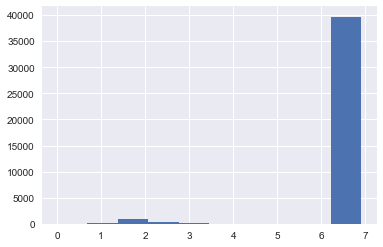

In [18]:
#заменим pdays на логарифм, чтобы сжать ось
df['pdays'] = df['pdays'].map(lambda s: math.log(s+1))
df['pdays'].hist()

In [19]:
df.month.unique()

array(['aug', 'may', 'jun', 'nov', 'oct', 'apr', 'jul', 'mar', 'sep', 'dec'], dtype=object)

In [20]:
def preprocess_data(df_input):
    df_output = df_input

    df_output.loc[:, 'month'] = df_output.month.replace({'jan': 1, 'feb': 2,'mar': 3,'apr': 4,'may': 5,'jun': 6, 
                                                         'jul': 7, 'aug': 8,'sep': 9,'oct': 10,'nov': 11,'dec': 12})
    for i in df_output.select_dtypes(exclude=[np.number]).columns:
        if i != '_id':
            #кодируем категории в числа 
            enc = LabelEncoder()
            df_output[i] = enc.fit_transform(df_output.loc[:, [i]].values)

    return df_output

In [21]:
df_preproc = df.pipe(preprocess_data)

C:\Users\nalgrgar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df_preproc.head(5)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,sample,p_fact
0,df7489733b004bbe40d3d37b34f82419,54,9,1,5,1,0,0,0,8,...,0,1,1.4,93.444,-36.1,4.963,5228.1,0,1,0
1,905a0b9a5456ee962223033473666be3,36,7,2,0,0,0,0,1,5,...,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,1,1,0,0,2,0,0,8,...,0,1,1.4,93.444,-36.1,4.965,5228.1,0,1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,1,1,2,0,2,2,1,5,...,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,7,2,6,0,2,0,1,8,...,0,1,-1.7,94.027,-38.3,0.890,4991.6,0,1,0


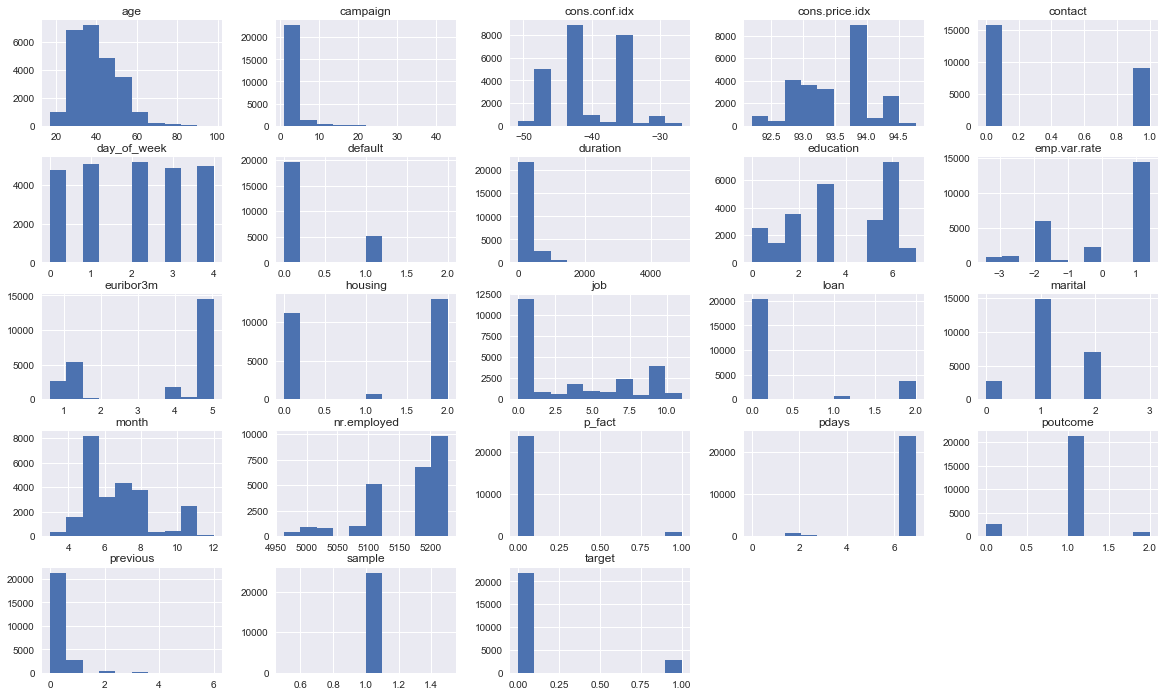

In [23]:
df_preproc[df['sample']==1].hist(figsize=(20, 12)); #посмотрим на наши данные (train)

In [24]:
df_preproc[df['sample']==1][['target', "_id"]].pivot_table(index = 'target', values = "_id", aggfunc='count') #посмотрим на наши данные (train)

,_id
target,
0,21925
1,2787


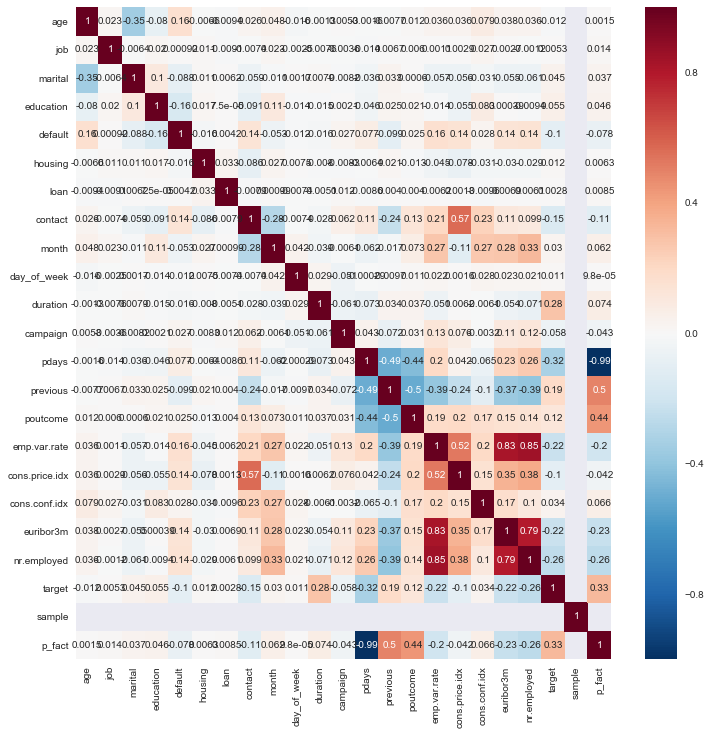

In [25]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_preproc[df['sample']==1].corr('kendall'), annot=True);

In [26]:
X, y = df_preproc[df['sample']==1].drop(['_id','target','sample'], axis = 1).values, df_preproc[df['sample']==1].iloc[:,-3].values #train выборка
ID, X_pred = df_preproc[df['sample']==0].iloc[:,0].values, df_preproc[df['sample']==0].drop(['_id','target','sample'], axis = 1).values #test (предсказательная) выборка

In [27]:
df_preproc.columns

Index(['_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target', 'sample',
       'p_fact'],
      dtype='object')

In [28]:
# начнем с KNN 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
classifier = KNeighborsClassifier()

In [32]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
# воспользуемся GridSearch для подбора параметров модели
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [5, 10, 25, 50, 100], 
               'weights': ['uniform','distance'],
               'algorithm': ['auto'],
               'p':[1,2]}]
        
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [34]:
grid_search.best_score_

0.93459195303853171

In [35]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=1,
           weights='distance')

In [ ]:
# попробуем скоррекировать количесвто соседей 

In [39]:
parameters = [{'n_neighbors': [40, 45, 50, 55, 60, 70, 90],
              'weights':['distance'],
               'p':[1,2]
              }] 
        
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [40]:
grid_search.best_score_

0.93479758685354841

In [41]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=1,
           weights='distance')

In [ ]:
########################## NNeighbors #####################################
# параметры нашей модели: 
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#           metric_params=None, n_jobs=1, n_neighbors=60, p=1,
#           weights='distance')
###########################################################################

In [95]:
# посмотрим на решающие деревья

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [53]:
parameters = [{'class_weight': [None, 'balanced'],
               'criterion': ['gini', 'entropy'], 
               'max_depth': [1,2,4,6,8,10],
               'max_features': [2,3,4,5,6,7,8,9,10],
               'min_samples_leaf': [1,2,3,4,5,6]
              }]
        
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [54]:
grid_search.best_score_

0.93095017124921908

In [55]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
########################## Decision Trees ##################################
#DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
#            max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
#            min_samples_leaf=6, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#            splitter='best')
###########################################################################

In [ ]:
pd.DataFrame(classifier.feature_importances_, \
                                      index = list(df_preproc.columns[:-1])).plot(kind='bar', figsize = (20,12))

In [31]:
#для логистической регрессии сперва подготовим данные

In [32]:
def sparse_data(df_input):
    
    df_output = df_input.copy()
    
    for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']:
        enc = OneHotEncoder(sparse=False)
        encoded = enc.fit_transform(df_output.loc[:, [i]].values)
        
        df_output = pd.concat([df_output,pd.DataFrame(encoded, columns = [i + "=" + str(k) for k in enc.active_features_])] ,axis = 1)

        #удалим из датасета переменную, которую мы уже закодировали
        df_output = df_output.drop([i], axis=1)
        
        #а также удалим один из новых векторов, чтобы избежать "ловушки" мультиколлинеарности
        if enc.n_values_>1:
            df_output = df_output.drop([df_output.columns[-1]], axis=1)        
            
    return df_output

In [33]:
df_regression = df_preproc.drop(['target'], axis = 1).pipe(sparse_data)
df_regression.shape

(41188, 56)

In [34]:
df_regression.columns

Index(['_id', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'sample', 'p_fact', 'job=0', 'job=1', 'job=2', 'job=3',
       'job=4', 'job=5', 'job=6', 'job=7', 'job=8', 'job=9', 'job=10',
       'marital=0', 'marital=1', 'marital=2', 'education=0', 'education=1',
       'education=2', 'education=3', 'education=4', 'education=5',
       'education=6', 'default=0', 'default=1', 'housing=0', 'housing=1',
       'loan=0', 'loan=1', 'contact=0', 'month=3', 'month=4', 'month=5',
       'month=6', 'month=7', 'month=8', 'month=9', 'month=10', 'month=11',
       'day_of_week=0', 'day_of_week=1', 'day_of_week=2', 'day_of_week=3',
       'poutcome=0', 'poutcome=1'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X_scaled = scaler.fit_transform(df_regression.drop(['sample'], axis = 1).iloc[:,1:].values)
train_sample_size = df_regression[df_regression['sample']==1].shape[0]

In [37]:
X_train_log, X_test_log, y_train_log, y_test_log = \
train_test_split(X_scaled[0:train_sample_size,:], 
                 y, 
                 test_size=0.3, 
                 random_state=42)
X_true_log = X_scaled[train_sample_size:,:]

In [38]:
X_true_log.shape

(16476, 54)

In [53]:
# теперь построим модель с помощью логистической регрессии
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

parameters = [{'C': [0.1, 1, 10], 
               'fit_intercept': [True, False],
               'max_iter': [100],
               'penalty': ['l2'], 
               'solver': ['newton-cg', 'lbfgs', 'sag'],
               'class_weight': [None, 'balanced']},
             {'C': [0.1, 1, 10], 
               'fit_intercept': [True, False],
               'max_iter': [100],
               'penalty': ['l1'], 
               'solver': ['liblinear'],
               'class_weight': [None, 'balanced']}]

grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train_log, y_train_log)

C:\Users\nalgrgar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [41]:
grid_search.best_estimator_

NameError: name 'grid_search' is not defined

In [55]:
grid_search.best_score_

0.90140840110248943

In [ ]:
########################## Regression ##################################
# LogisticRegression(C=0.1, class_weight='balanced', dual=False,
#          fit_intercept=True, intercept_scaling=1, max_iter=100,
#          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
#          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
###########################################################################

In [64]:
################################## Model selection #########################
# Модели обсчитаны, выберем наиучшую

In [39]:
def model_roc_auc_curve (_classifier, _Xtrain, _ytrain, _Xtest, _ytest):
    classifier.fit(_Xtrain, _ytrain)
    y_hat_proba = classifier.predict_proba(_Xtest)
    preds = y_hat_proba[:,1]
    fpr, tpr, threshold = roc_curve(_ytest, preds)
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc, threshold

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

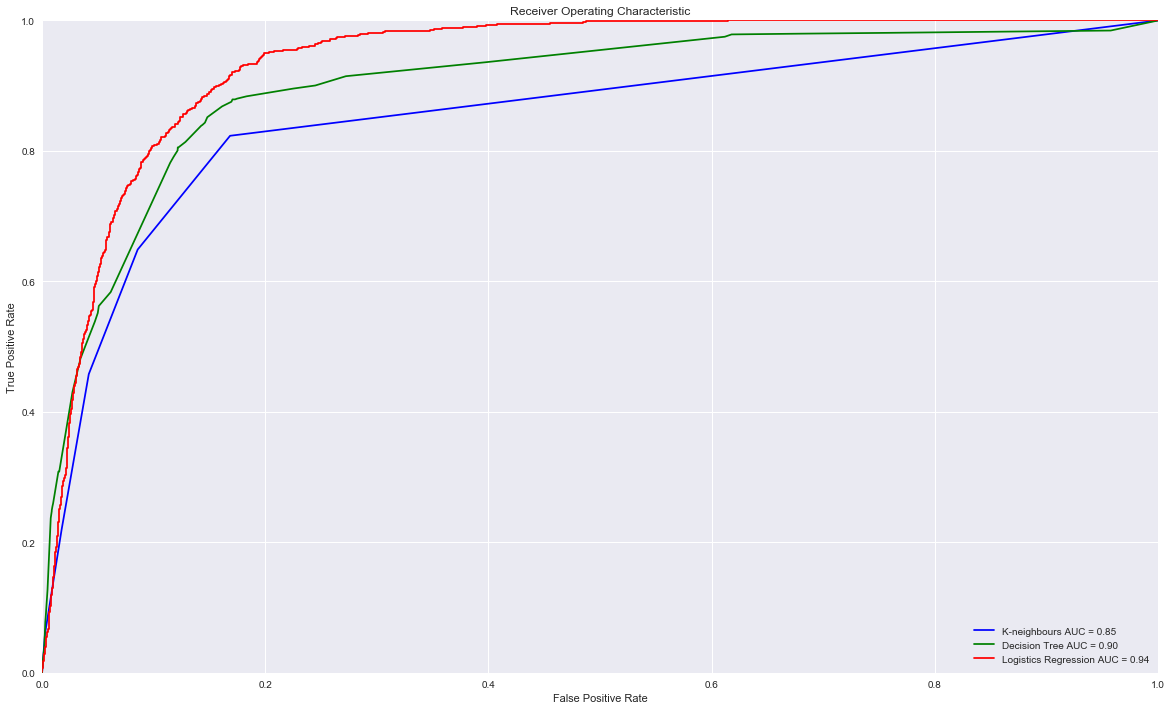

In [41]:
#построим модели roc_auc_curve для них
import matplotlib.pyplot as plt
plt.figure(figsize=[20,12])
plt.title('Receiver Operating Characteristic')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# KNN
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
fpr, tpr, roc_auc, threshold = model_roc_auc_curve(classifier, X_train, y_train, X_test, y_test)
plt.plot(fpr, tpr, 'b', label = 'K-neighbours AUC = %0.2f' % roc_auc)

# Decision trees
classifier = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
fpr, tpr, roc_auc, threshold = model_roc_auc_curve(classifier, X_train, y_train, X_test, y_test)
plt.plot(fpr, tpr, 'g', label = 'Decision Tree AUC = %0.2f' % roc_auc)

#Logistics Regression
classifier = LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
fpr, tpr, roc_auc, threshold = model_roc_auc_curve(classifier, X_train_log, y_train_log, X_test_log, y_test_log)
plt.plot(fpr, tpr, 'r', label = 'Logistics Regression AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.show()

In [42]:
# предскажем, используя регрессию
y_hat_pred = classifier.predict(X_true_log)
y_hat_pred_proba = classifier.predict_proba(X_true_log)

In [43]:
for k, j in enumerate(tpr):
    if j > 0.90:
        print (k, j,threshold[k])
        
        break

728 0.900355871886 0.464205153116


In [44]:
df_tmp = df_regression[df_regression['sample']==0][['_id']].reset_index(drop=True)

# зададим порог в 0.3, как значение threshold для вероятности prediction based on probability
df_tmp = df_regression[df_regression['sample']==0][['_id']].reset_index(drop=True)
proba = pd.DataFrame(y_hat_pred_proba[:,1],columns = ['target'])
proba[proba['target']>= threshold[k]] = 1
proba[proba['target']< threshold[k]] = 0

In [45]:
df_result = pd.concat([df_tmp,proba],axis = 1, names = ['_id','target'])

In [46]:
df_result.head(5)

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0.0
1,ccac3879652b08cb8b44c1920fd93afa,0.0
2,fcccab4d7a76f70647f015f2c84c2af8,0.0
3,ed8399278c30678dab739045fa12b440,0.0
4,1d4d62ac5cabcb48bac7112813f290cb,0.0


In [47]:
df_result.to_csv('submission.csv', sep=',', encoding='utf8',index = False)